# Data Acquisition

<strong>Data acquisition</strong> (commonly abbreviated as <strong>DAQ</strong> or DAS) is the process of sampling signals that measure real-world physical phenomena and converting them into a digital form that can be manipulated by a computer and software.

## Libraties

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

## Getting Data - Reading data from various sources

* pd.Series() е една колона от данни (за pandas е важно тя да бъде от един и същи тип)
* shift + tab ни показва документацията



In [2]:
type([1, 2, 3, 4.5, True, "Nati"]) #за python не е важен типа

list

In [3]:
pd.Series() 
#pd.Series([1, 2, 3, 4.5, True, "Nati"]) # това е от type object, което не ни върши работа
series = pd.Series([1, 2, 3])

C:\Users\stoic\AppData\Local\Temp\ipykernel_6196\1862613496.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


In [4]:
type(series)

pandas.core.series.Series

* една таблица винаги е двомерна n(редове) x m(колони), обикновено се използва термина DataSet. В pandas използваме <strong>DataFrame</strong>

In [5]:
pd.DataFrame() # празна таблица

""


In [6]:
#подаване на данните по колони
frame =pd.DataFrame({
    "col1" : [1, 2, 3],
    "col2" : [4, 10, 18]
}) 

In [7]:
type(frame)

pandas.core.frame.DataFrame

In [8]:
frame["col1"] #колона

0    1
1    2
2    3
Name: col1, dtype: int64

In [9]:
frame[["col1"]] #таблица от една колона;
#външните скоби са за индексиране, вътрешните за списък

,col1
0,1
1,2
2,3


Има данни, които са таблични и такива които не са таблични
- за да можем да работим с данните трябва да ги превърнем в таблични
Неструктурирани данни - данни, които нямат модел(снимки, уеб станици, текст)
Най-чести източници на данни:
- таблици в текстов формат например .csv
- Excel, Google Sheets ...
- Web services
- Бази от данни

# Reading data from file

In [10]:
accidents = pd.read_csv("data/accidents.csv") #относителен път - спрямо мястото, където се намира текущата тетрадка
# ако използваме \ за пътя трябва да го ескейпнем т.е. използваме "data\\accidents.csv"

In [11]:
accidents

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [12]:
accidents.head() #първите 5 записа

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6


In [13]:
accidents.head(7) #първите 7 записа

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [14]:
accidents.tail() #последните 5 записа

,Miles from Home,% of Accidents
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [15]:
accidents.shape #форматът на данните

(6, 2)

In [16]:
accidents.columns #pandas работи с два индекса: индекс по колони и индекс по редове
#затова колоните са индекс за pandas

Index(['Miles from Home', '% of Accidents'], dtype='object')

In [17]:
accidents.columns.values #за получаване на масив от имената на колоните

array(['Miles from Home', '% of Accidents'], dtype=object)

In [18]:
accidents.index #дава стойностите на индексът по редове

RangeIndex(start=0, stop=6, step=1)

In [19]:
accidents.dtypes #типът на всяка една колона ; там където имаме string получаваме object, също и когато има различни типове в една колона

Miles from Home    object
% of Accidents      int64
dtype: object

In [22]:
grean_trip = pd.read_excel("data/green_tripdata_2015-09.xls")

In [23]:
grean_trip.shape

(65535, 21)

In [24]:
grean_trip.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [26]:
grean_trip.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

In [27]:
grean_trip["Payment_type"].dtype

dtype('int64')

In [28]:
grean_trip["Payment_type"]

0        1
1        1
2        1
3        2
4        2
        ..
65530    2
65531    1
65532    1
65533    1
65534    2
Name: Payment_type, Length: 65535, dtype: int64

In [29]:
grean_trip["Payment_type"].value_counts()

2    36131
1    28912
3      281
4      207
5        4
Name: Payment_type, dtype: int64

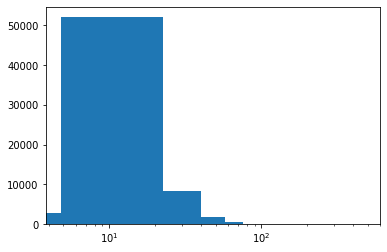

In [35]:
plt.hist(grean_trip["Total_amount"], bins = 50)
plt.semilogx() #логаритмична скала по х
plt.show()

# Reading data from Web Services
Най-често използвани са json и xml

In [37]:
pd.read_json("https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json", orient= "index") #можем да променяме начина, по който pandas да чете данните с orient; 
# четем какви ориентации имаме от документацията shift + tab 

,bib_key,info_url,preview,preview_url,thumbnail_url
ISBN:9780345354907,ISBN:9780345354907,https://openlibrary.org/books/OL9831606M/The_C...,borrow,https://archive.org/details/caseofcharlesdex00...,https://covers.openlibrary.org/b/id/207586-S.jpg
ISBN:0881847690,ISBN:0881847690,https://openlibrary.org/books/OL22232644M/Watc...,borrow,https://archive.org/details/watchersoutoftim00...,https://covers.openlibrary.org/b/id/9871313-S.jpg
LCCN:2005041555,LCCN:2005041555,https://openlibrary.org/books/OL3421202M/At_th...,borrow,https://archive.org/details/atmountainsofmad00...,https://covers.openlibrary.org/b/id/8259841-S.jpg
ISBN:0060957905,ISBN:0060957905,https://openlibrary.org/books/OL6784868M/Tales...,noview,https://openlibrary.org/books/OL6784868M/Tales...,https://covers.openlibrary.org/b/id/676505-S.jpg


# Reading from SQL
За четене от база данни трябва да инсталираме следната библиотека:

In [39]:
pip install pyodbc

     ---------------------------------------- 74.9/74.9 kB ? eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Web scraping

Взимане на данни от уеб страница

web crawling - последване на всички линкове от една страница и линковете на страниците до които те водят на определена дълбочина  

# Using multiple data sources

## Merging data sources

In [51]:
tracks = pd.read_csv("data/fma_metadata/tracks.csv", skiprows = 1) # skiprows защото първият ред не ни трябва
tracks

C:\Users\stoic\AppData\Local\Temp\ipykernel_6196\3586194078.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = pd.read_csv("data/fma_metadata/tracks.csv", skiprows = 1) # skiprows защото първият ред не ни трябва


,Unnamed: 0,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
0,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,...,NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106570,155316,0.0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0.0,22940.0,"<p>A live performance at Monty Hall on Feb 17,...",1506.0,Monty Hall,...,NaN,122.0,NaN,Creative Commons Attribution-NonCommercial-NoD...,102.0,NaN,3.0,NaN,[],The Auger
106571,155317,0.0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0.0,22940.0,"<p>A live performance at Monty Hall on Feb 17,...",1506.0,Monty Hall,...,NaN,194.0,NaN,Creative Commons Attribution-NonCommercial-NoD...,165.0,NaN,4.0,NaN,[],Let's Skin Ruby
106572,155318,0.0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0.0,22940.0,"<p>A live performance at Monty Hall on Feb 17,...",1506.0,Monty Hall,...,NaN,214.0,NaN,Creative Commons Attribution-NonCommercial-NoD...,168.0,NaN,6.0,NaN,[],My House Smells Like Kim Deal/Pulp
106573,155319,0.0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0.0,22940.0,"<p>A live performance at Monty Hall on Feb 17,...",1506.0,Monty Hall,...,NaN,336.0,NaN,Creative Commons Attribution-NonCommercial-NoD...,294.0,NaN,5.0,NaN,[],The Man With Two Mouths


In [52]:
tracks = tracks.drop(0)

In [53]:
tracks.rename(columns = {"Unnamed: 0" : "id"})

,id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,...,NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway
5,20,0.0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2.0,4.0,"<p> ""spiritual songs"" from Nicky Cook</p>",2710.0,NaN,...,NaN,978.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,361.0,NaN,3.0,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106570,155316,0.0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0.0,22940.0,"<p>A live performance at Monty Hall on Feb 17,...",1506.0,Monty Hall,...,NaN,122.0,NaN,Creative Commons Attribution-NonCommercial-NoD...,102.0,NaN,3.0,NaN,[],The Auger
106571,155317,0.0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0.0,22940.0,"<p>A live performance at Monty Hall on Feb 17,...",1506.0,Monty Hall,...,NaN,194.0,NaN,Creative Commons Attribution-NonCommercial-NoD...,165.0,NaN,4.0,NaN,[],Let's Skin Ruby
106572,155318,0.0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0.0,22940.0,"<p>A live performance at Monty Hall on Feb 17,...",1506.0,Monty Hall,...,NaN,214.0,NaN,Creative Commons Attribution-NonCommercial-NoD...,168.0,NaN,6.0,NaN,[],My House Smells Like Kim Deal/Pulp
106573,155319,0.0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0.0,22940.0,"<p>A live performance at Monty Hall on Feb 17,...",1506.0,Monty Hall,...,NaN,336.0,NaN,Creative Commons Attribution-NonCommercial-NoD...,294.0,NaN,5.0,NaN,[],The Man With Two Mouths


In [54]:
tracks.columns

Index(['Unnamed: 0', 'comments', 'date_created', 'date_released', 'engineer',
       'favorites', 'id', 'information', 'listens', 'producer', 'tags',
       'title', 'tracks', 'type', 'active_year_begin', 'active_year_end',
       'associated_labels', 'bio', 'comments.1', 'date_created.1',
       'favorites.1', 'id.1', 'latitude', 'location', 'longitude', 'members',
       'name', 'related_projects', 'tags.1', 'website', 'wikipedia_page',
       'split', 'subset', 'bit_rate', 'comments.2', 'composer',
       'date_created.2', 'date_recorded', 'duration', 'favorites.2',
       'genre_top', 'genres', 'genres_all', 'information.1', 'interest',
       'language_code', 'license', 'listens.1', 'lyricist', 'number',
       'publisher', 'tags.2', 'title.1'],
      dtype='object')

In [55]:
tracks["genre_top"]

1         Hip-Hop
2         Hip-Hop
3         Hip-Hop
4             Pop
5             NaN
           ...   
106570       Rock
106571       Rock
106572       Rock
106573       Rock
106574        NaN
Name: genre_top, Length: 106574, dtype: object

In [57]:
tracks["genres_all"]

1                      [21]
2                      [21]
3                      [21]
4                      [10]
5         [17, 10, 76, 103]
                ...        
106570             [25, 12]
106571             [25, 12]
106572             [25, 12]
106573             [25, 12]
106574     [169, 10, 12, 9]
Name: genres_all, Length: 106574, dtype: object

In [58]:
tracks.dtypes

Unnamed: 0            object
comments             float64
date_created          object
date_released         object
engineer              object
favorites            float64
id                   float64
information           object
listens              float64
producer              object
tags                  object
title                 object
tracks               float64
type                  object
active_year_begin     object
active_year_end       object
associated_labels     object
bio                   object
comments.1           float64
date_created.1        object
favorites.1          float64
id.1                 float64
latitude             float64
location              object
longitude            float64
members               object
name                  object
related_projects      object
tags.1                object
website               object
wikipedia_page        object
split                 object
subset                object
bit_rate             float64
comments.2    

In [60]:
genres = pd.read_csv("data/fma_metadata/genres.csv")
genres

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
...,...,...,...,...,...
158,1032,60,102,Turkish,2
159,1060,30,46,Tango,2
160,1156,26,130,Fado,2
161,1193,72,763,Christmas,38


In [61]:
sample_tracks = tracks.sample(50, random_state = 42) # 50 случайни записа - винаги едни и същи

In [66]:
sample_tracks.merge(
    genres,
    how = "left" # left join
    left_on = "genre_top", right_on = "title")[["title_x", "listens", "title_y"]] #използваме само on ако имената на колоните са еднакви

,title_x,listens,title_y
0,QUELLO ROTTO,3139.0,Hip-Hop
1,The Window,-1.0,Hip-Hop
2,The Mixtape Sessions,1809.0,Hip-Hop
3,Stimulus EP,1375.0,Hip-Hop
4,Live at WFMU on the Cherry Blossom Clinic May ...,4642.0,Rock
5,"Their Music, Our Lives",10262.0,Rock
6,Live on WFMU's This Is The Modern World with T...,4492.0,Electronic
7,Chaotic Lives,796.0,Electronic
8,"Basement Skylights (Tab, Anitek, A.U.R.C., Her...",23405.0,Electronic
9,Lost At Sea II,4661.0,Electronic
